# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [58]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

res1:  [ 9.99999974e-01  7.58007725e-06 -8.00028383e+00  4.16142769e-03
  1.06350033e+01  1.42016479e-01 -6.09002552e+00  7.37605224e-01
  7.31350261e-01  7.15476403e-01 -6.70528222e-01  1.41573277e-01]
10 µs ± 4.45 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 168.46 MiB, increment: 0.00 MiB
res2:  [ 1.00000000e+00 -4.22743385e-07 -7.99998124e+00 -3.18763318e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160319e-02
  1.69360697e+00  6.03210332e-03 -3.74241701e-01  8.80405757e-02]
131 µs ± 9.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 168.51 MiB, increment: 0.00 MiB
res3:  [ 1.00000000e+00 -4.22743397e-07 -7.99998124e+00 -3.18763328e-04
  1.06694308e+01 -1.38202903e-02 -5.64707562e+00 -7.53160342e-02
  1.69360697e+00  6.03210127e-03 -3.74241700e-01  8.80405756e-02]
45.9 µs ± 3.93 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
41 µs ± 7.98 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 168.52 MiB

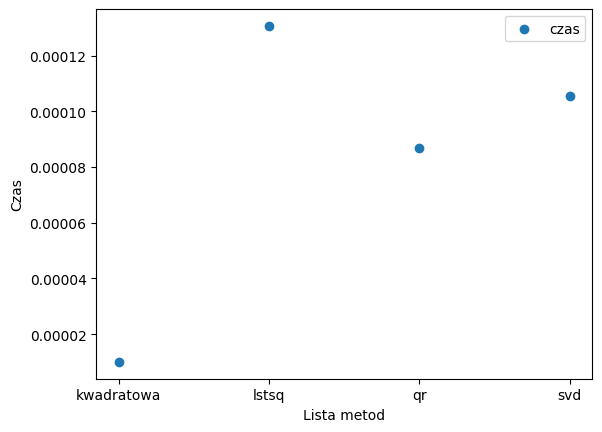

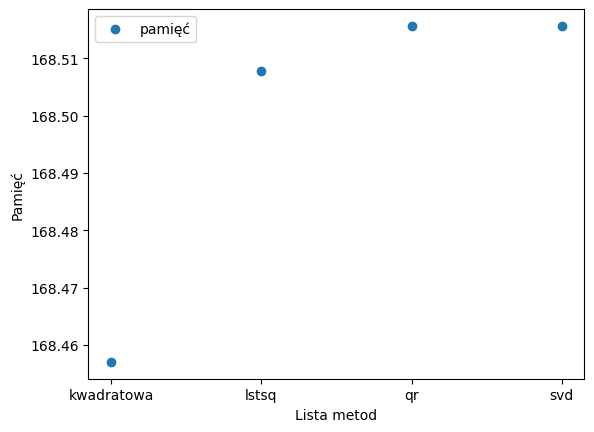

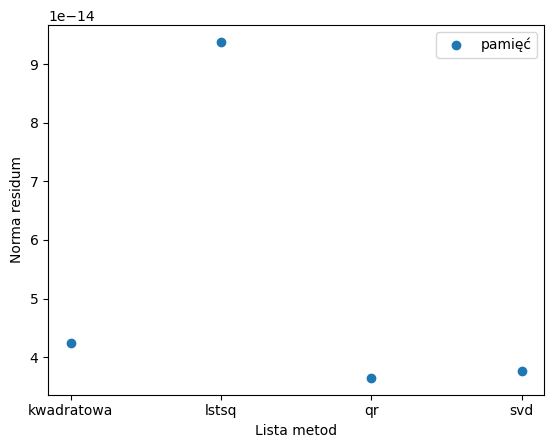

In [59]:
from main import residual_norm, spare_matrix_Abt, square_from_rectan

#Sprowadzanie do macierzy kwadratowej 
m = 50 
n = 12
A,b = spare_matrix_Abt(m,n)
A_upd , b_upd = square_from_rectan(A,b)
res1 = np.linalg.solve(A_upd,b_upd)
print("res1: " , res1)
time1 = %timeit -r 5 -n 10 -o np.linalg.solve(A_upd, b_upd)
t1= time1.average
mem1 = %memit -o np.linalg.solve(A_upd, b_upd)
m1 = mem1.mem_usage
residual1 = residual_norm(A_upd, res1, b_upd)

#metoda lstsq
#metoda najmniejszych kwadratow 

res2 = sp.linalg.lstsq(A,b)[0]
print("res2: ", res2)
time2 = %timeit -r 5 -n 10 -o sp.linalg.lstsq(A,b)[0]
t2 = time2.average
mem2 = %memit -o sp.linalg.lstsq(A,b)[0]
m2 = mem2.mem_usage
residual2 = residual_norm(A_upd, res2, b_upd)


#metoda qr
#Rozkład QR – w algebrze liniowej rozkład macierzy A do postaci iloczynu dwóch macierzy
#qr gdzie Q jest macierzą ortogonalną 
#i R jest macierzą trójkątną górną.
#Na bazie rozkładu QR możliwa jest 
#realizacja metody najmniejszych kwadratóoraz metod rozwiązywania układów równań liniowych

# zwraca macierze q - macierz wymiaru (m,min(m,n)) , r - macierz trojkatna gorna (min(m,n),n) 

q, r = np.linalg.qr(A)
res3 = sp.linalg.solve_triangular(r, np.dot(np.transpose(q),b))
print("res3: ", res3)
time3_1 = %timeit -r 5 -n 10 -o np.linalg.qr(A)
time3_2 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(r, np.dot(np.transpose(q),b))
t3 = time3_1.average + time3_2.average
mem3 = %memit -o sp.linalg.solve_triangular(r, np.dot(np.transpose(q),b))
m3 = mem3.mem_usage
residual3 = residual_norm(A_upd, res3, b_upd)

#rozklad svd 

[U,s,V] = np.linalg.svd(A, full_matrices= False)
S = np.diag(s)
res4 = np.dot(np.transpose(V), np.linalg.solve(S,np.dot(np.transpose(U) , b)))
print("res4: ",res4)
time4_1 = %timeit -r 5 -n 10 -o np.linalg.svd(A, full_matrices= False)
time4_2 = %timeit -r 5 -n 10 -o np.diag(s)
time4_3 = %timeit -r 5 -n 10 -o np.dot(np.transpose(V), np.linalg.solve(S,np.dot(np.transpose(U) , b)))
t4 = time4_1.average + time4_2.average + time4_3.average
mem4 = %memit -o np.dot(np.transpose(V), np.linalg.solve(S,np.dot(np.transpose(U) , b)))
m4 = mem4.mem_usage
residual4 = residual_norm(A_upd, res4, b_upd)

time = [t1 , t2, t3 ,t4 ]
mem = [m1, m2, m3, m4]
lista_metod = ['kwadratowa' , 'lstsq' , 'qr', 'svd']
residum = [residual1, residual2, residual3, residual4]


plt.scatter(lista_metod, time, label ='czas')
plt.xlabel('Lista metod')
plt.ylabel('Czas')
plt.legend()
plt.show()

plt.scatter(lista_metod, mem, label ='pamięć')
plt.xlabel('Lista metod')
plt.ylabel('Pamięć')
plt.legend()
plt.show()

plt.scatter(lista_metod, residum, label ='Dokładnosc')
plt.xlabel('Lista metod')
plt.ylabel('Norma residum')
plt.legend()
plt.show()





***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


X:  [210 270 290 310 370 400 450 480 510 520]
y:  [140 190 250 270 290 310 340 360 420 390]
[[210]
 [270]
 [290]
 [310]
 [370]
 [400]
 [450]
 [480]
 [510]
 [520]]
[0.77752809]
[163.28089888 209.93258427 225.48314607 241.03370787 287.68539326
 311.01123596 349.88764045 373.21348315 396.53932584 404.31460674]


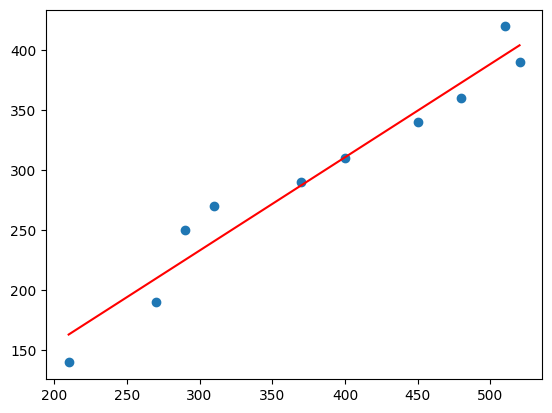

In [60]:

x1 = np.array([210 ,270 , 290 , 310 , 370 , 400 , 450 , 480 , 510 , 520])
x2 = np.array([140 , 190 , 250 , 270 , 290 , 310 , 340 , 360 , 420 , 390 ])
'''
plt.scatter(x1,x2,label='dochody-wydatki')
plt.xlabel('Dochody')
plt.ylabel('Wydatki')
plt.legend()
plt.show()
'''
X, y = x1,x2
print("X: ",X)
print("y: ", y)
#robie z tego macierz o jednej kolumnie 
X = X.reshape((len(X), 1))
print(X)
#do b to jest wartosc przez ktora bedziemy wszystko mnozyc 
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
#to juz jest linia regresii po pomnozeniu przez wszsytkie wartosci b  
yhat = X.dot(b)
print(yhat)
plt.scatter(X, y)
plt.plot(X, yhat, color='red')
plt.show()




***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

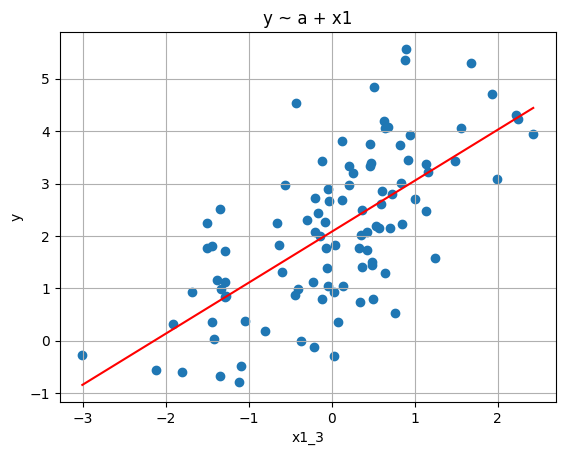

In [61]:
#pred1=[min(x1), max(x1)]
#pred2=[min(x2), max(x2)]

#generowanie 3 wektorow o sredniej 0 i odchyleniu 1
x1_3 = np.random.normal(0, 1, size=(100, 1))
x2_3 = np.random.normal(0, 1, size=(100, 1))
epsilon = np.random.normal(0, 1, size=(100,1))

y = 2+x1_3-0.5*x2_3 + epsilon

one_s = np.ones((100,1))
#axis - os wzgledem ktorej laczone sa tablice 
x1_3con = np.concatenate((one_s,x1_3) , axis =1)
#jedynki polewej wartosci x1_3 po prawej 
#print("x1_3con: ", x1_3con)
x2_3con = np.concatenate((one_s,x2_3) , axis =1)
#print("x2_3con: ", x2_3con)
x12_3con = np.concatenate((one_s,x1_3,x2_3) , axis =1)
#print("x12_3con: ", x12_3con)

#1   y ~ a + x1 
q1, r1 = np.linalg.qr(x1_3con)
#print("q1: ", q1 , " r1: ", r1)
a1 = sp.linalg.solve_triangular(r1, np.dot(np.transpose(q1),y))
#print(a1) #dwuelementowy 
#print("a1[0]: ", a1[0]) 1,9045.. 
#print("a1[1]: ", a1[1] ) 0.9456..
pred1=[min(x1_3), max(x1_3)] 
#print("pred1 : " , pred1) array najmniejszej i najwiekszej , to sa wartosci najmneijszej i najwiekszej lini regresji na osi x 
aprox1 = a1[0] + a1[1] * pred1
#print("Aprox1: " , aprox1) #tez array dwuelementowy i to sa wartosci najmenijsze i najwiekszy linni regresji na osi y  

plt.scatter(x1_3,y)
plt.plot(pred1,aprox1, "r")
plt.xlabel("x1_3")
plt.ylabel("y")
plt.title("y ~ a + x1")
plt.grid()
plt.show()



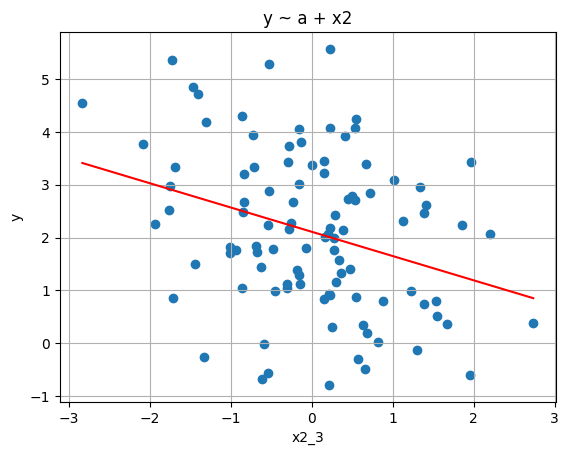

In [62]:
#2   y ~ a + x2 
q2, r2 = np.linalg.qr(x2_3con)
a2 = sp.linalg.solve_triangular(r2, np.dot(np.transpose(q2) ,y))
#print("a2: " , a2) dwuwymiarowy wykres 
pred2=[min(x2_3), max(x2_3)]
aprox2 = a2[0] + a2[1] * pred2

plt.scatter(x2_3,y)
plt.plot(pred2,aprox2, "r")
plt.xlabel("x2_3")
plt.ylabel("y")
plt.title("y ~ a + x2")
plt.grid()
plt.show()

a3:  [[ 2.0776978 ]
 [ 1.02020805]
 [-0.5490464 ]]


Text(0.5, 0, 'y axis')

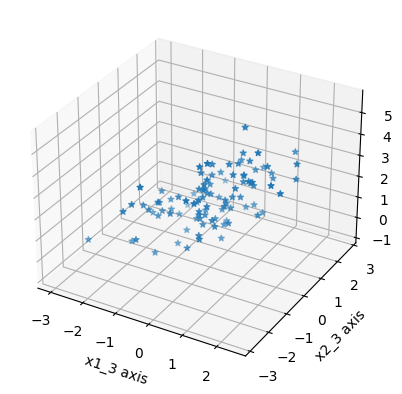

In [63]:
#3   y ~ a + x1 + x2 

q3, r3 = np.linalg.qr(x12_3con)
a3 = sp.linalg.solve_triangular(r3, np.dot(np.transpose(q3),y))
print('a3: ' , a3 ) #a3 wyszlo 3-wymiarowe wiec powinno byc w 3 wymiarach
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1_3, x2_3, y, marker="*")
ax.set_xlabel("x1_3 axis")
ax.set_ylabel("x2_3 axis")
ax.set_zlabel("y axis")








a3:  [[ 2.11002494]
 [-0.45889767]]


Text(0.5, 0, 'y axis')

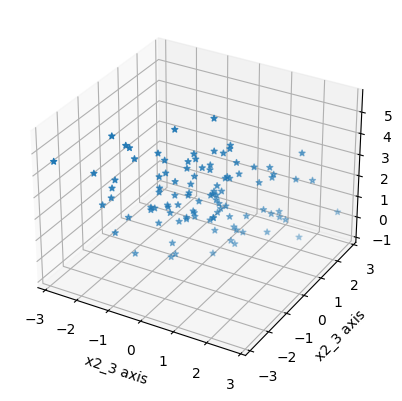

In [64]:
#3   y ~ a + x1 + x2 

q4, r4 = np.linalg.qr(x2_3con)
a4 = sp.linalg.solve_triangular(r4, np.dot(np.transpose(q4),y))
print('a3: ' , a4 ) #a3 wyszlo 3-wymiarowe wiec powinno byc w 3 wymiarach
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x2_3, x2_3, y, marker="*")
ax.set_xlabel("x2_3 axis")
ax.set_ylabel("x2_3 axis")
ax.set_zlabel("y axis")


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)